# K Nearest Neighbours with Python

### How does KNN Algorithm work?


The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems.

KNN is used in variety of applications such as healthcare, political science and handwriting detection, image recognition and video recognition.

KNN is based on feature similarity approach.

![alt text](KNN.png "KNN for n = 1")

In KNN, K is number of nearest neighbours. The no of nearest neighbours is the core deciding factor. K is generally a odd number if no of classes is 2. Suppose the point P1 is there in the place of '?' in the above picture for which label needs to be predicted.

If k = 1, then we find one closest neighbour for the unlabeled datapoint and then assign it with that neighbour's label

For finding closest  similar points, you find the distance between points using distance measures as Euclidean Distance, Hamming distance, Manhattan distance and Minkowski distance. KNN has following steps:


- Calculate distance
- Find closest neighbours
- vote for labels

![alt text](knn2.png "KNN for n = 3")

Here in the above figure we have calculated knn for k = 3

### Curse of DImensionality

![alt text](dimensionality_vs_performance.png "dimensionality_vs_performance")

In the above graph, we can see that as dimensions/features increase model performance decreases

Increase in number of features leads to overfitting. To avoid overfitting, we need to get large data for fitting those features correctly

To deal with the problem of Curse of Dimensionality, instead of getting large datasets which is difficult, we can perform Principal Component Analysis(PCA) or a good feature selection technique. 

For a dataset with large dimension, Euclidean Distance is not useful and hence we can use other measures like cosine similarity, which doesnt get much affected by high dimesional datasets

### How do we decide the value of K?


![alt text](KNN_final.png "KNN for n = 3")

The value of K is a hyperparameter that we need to choose while model building. We can say K as controlling varibale for the model. No particular value of K can set to all datasets

To select appropriate value for k, we calculate mean squared error and performace of the model for variable number of nearst neighbours for the problem and make a list and plot it. Then from this we can get the value of K

### Classifier Building in Python using Scikit-Learn

For this, we are going to take wine dataset which is mutli-class classification.

In [5]:
from sklearn import datasets

In [8]:
wine = datasets.load_wine()

In [12]:
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [16]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [18]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [19]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [22]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

#### Import Libraries

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [28]:
x = wine.data
y = wine.target

In [29]:
print(x.shape,y.shape)

(178, 13) (178,)


#### Splitting the data into train and test data

In [30]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 42, stratify = y)

### Generating model for different values of K

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 

In [42]:
def knn_model(k_size):
    model = knn = KNeighborsClassifier(n_neighbors = k_size)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test,y_predict))

In [43]:
knn_model(3)

Accuracy:  0.6851851851851852


In [44]:
knn_model(5)

Accuracy:  0.7222222222222222


In [46]:
knn_model(7)

Accuracy:  0.7407407407407407


In [47]:
knn_model(9)

Accuracy:  0.7222222222222222


Increasing the K value need not increase the accuracy all the time.

Training phase of KNN is faster as compared to other classification algorithms. KNN need not be trained for generalization and hence it is called simple and instance based learning algorithm. It is useful in cases of non-linear data

KNN is slower and costlier in terms of space and time. KNN requires scaling of data for calculating Euclidean distance between two data points. Euclidean distance is sensitive to magnitudes. Features with higher magnitudes  will affect more than features with lower magnitudes. KNN is not suitable for large datasets also

## Improve KNN

#### Standardization in Sklearn

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y, test_size = 0.3, random_state = 42, stratify = y)

In [52]:
knn_model(3)

Accuracy:  0.9444444444444444


In [53]:
knn_model(5)

Accuracy:  0.9444444444444444


In [54]:
knn_model(7)

Accuracy:  0.9444444444444444


In [55]:
knn_model(9)

Accuracy:  0.9629629629629629


In [56]:
knn_model(11)

Accuracy:  0.9629629629629629


In [57]:
knn_model(13)

Accuracy:  0.9629629629629629


In [58]:
knn_model(15)

Accuracy:  0.9814814814814815


In [59]:
knn_model(17)

Accuracy:  0.9814814814814815


In [60]:
knn_model(19)

Accuracy:  0.9814814814814815


In [61]:
knn_model(21)

Accuracy:  1.0


Now we are not sure about the value of K. Lets now do parameter tuning with cross validation

### Parameter Tuning with Cross-Validation

![alt text](cv_knn.png "dimensionality_vs_performance")

In [62]:
from sklearn.model_selection import cross_val_score

In [63]:
neighbors = list(range(1, 50, 2))

cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_scaled, y, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())

In [64]:
cv_scores

[0.9434640522875817,
 0.9545751633986927,
 0.9604575163398692,
 0.9663398692810456,
 0.9718954248366012,
 0.9718954248366012,
 0.9663398692810456,
 0.9663398692810456,
 0.9722222222222221,
 0.9722222222222221,
 0.9722222222222221,
 0.9833333333333334,
 0.9718954248366012,
 0.9718954248366012,
 0.9660130718954247,
 0.9660130718954247,
 0.9777777777777779,
 0.9777777777777779,
 0.9722222222222221,
 0.9722222222222221,
 0.9663398692810456,
 0.9663398692810456,
 0.9604575163398692,
 0.9604575163398692,
 0.9604575163398692]

In [67]:
MSE = [1 - x for x in cv_scores]
MSE

[0.05653594771241832,
 0.04542483660130725,
 0.0395424836601308,
 0.03366013071895435,
 0.028104575163398815,
 0.028104575163398815,
 0.03366013071895435,
 0.03366013071895435,
 0.0277777777777779,
 0.0277777777777779,
 0.0277777777777779,
 0.016666666666666607,
 0.028104575163398815,
 0.028104575163398815,
 0.033986928104575265,
 0.033986928104575265,
 0.022222222222222143,
 0.022222222222222143,
 0.0277777777777779,
 0.0277777777777779,
 0.03366013071895435,
 0.03366013071895435,
 0.0395424836601308,
 0.0395424836601308,
 0.0395424836601308]

In [70]:
optimal_k = neighbors[MSE.index(min(MSE))]
print('Optimal Value of K is :',optimal_k)

Optimal Value of K is : 23


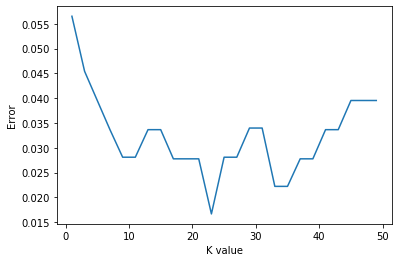

In [72]:
plt.plot(neighbors, MSE)
plt.xlabel('K value')
plt.ylabel('Error')
plt.show()